In [5]:
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['figure.facecolor'] = 'white'

In [11]:
df0=pd.read_pickle("./rundf/df_run_CTRL_rr.pkl")
df0=df0[0.1:]

# df1=pd.read_pickle("./rundf/df_run_CTRL.pkl")
# df1=df1[0.1:]

runs=['03','04','05','06','07','08','09','10','11','12','13']
# runs=['03','04','06','10','12']
fnames=['rundf/df_run_land_t' + r + '_rr.pkl' for r in runs]

nt=13
dfs=[pd.read_pickle(f).head(nt) for f in fnames]


# dryruns=['03','08','09','13']
dryruns=['03','04','05','06','07','08','09','10','11','12','13']
fnames=['rundf/df_run_land_dry_t' + r +'.pkl' for r in dryruns]
dfdrys=[pd.read_pickle(f).head(nt) for f in fnames]

dryruns=['06']
fnames=['rundf/df_run_land_dry_t' + r + '_QFX' +'.pkl' for r in dryruns]
dfds=[pd.read_pickle(f).head(nt) for f in fnames]

# fnames='rundf/df_run_land_dry_SM0_t06.pkl'
# dfd0s=[pd.read_pickle(f).head(36) for f in fnames]

fnames=['rundf/df_run_land_QFX0_dry.pkl']
dfdQ0ds=[pd.read_pickle(f).head(nt) for f in fnames]

fnames=['rundf/df_run_land_dry_allQ_SM0_t06.pkl']
dfdQs=[pd.read_pickle(f).head(nt) for f in fnames]

fnames=['rundf/df_run_land_QFX0_test.pkl']
dfdQF0s=[pd.read_pickle(f).head(nt) for f in fnames]

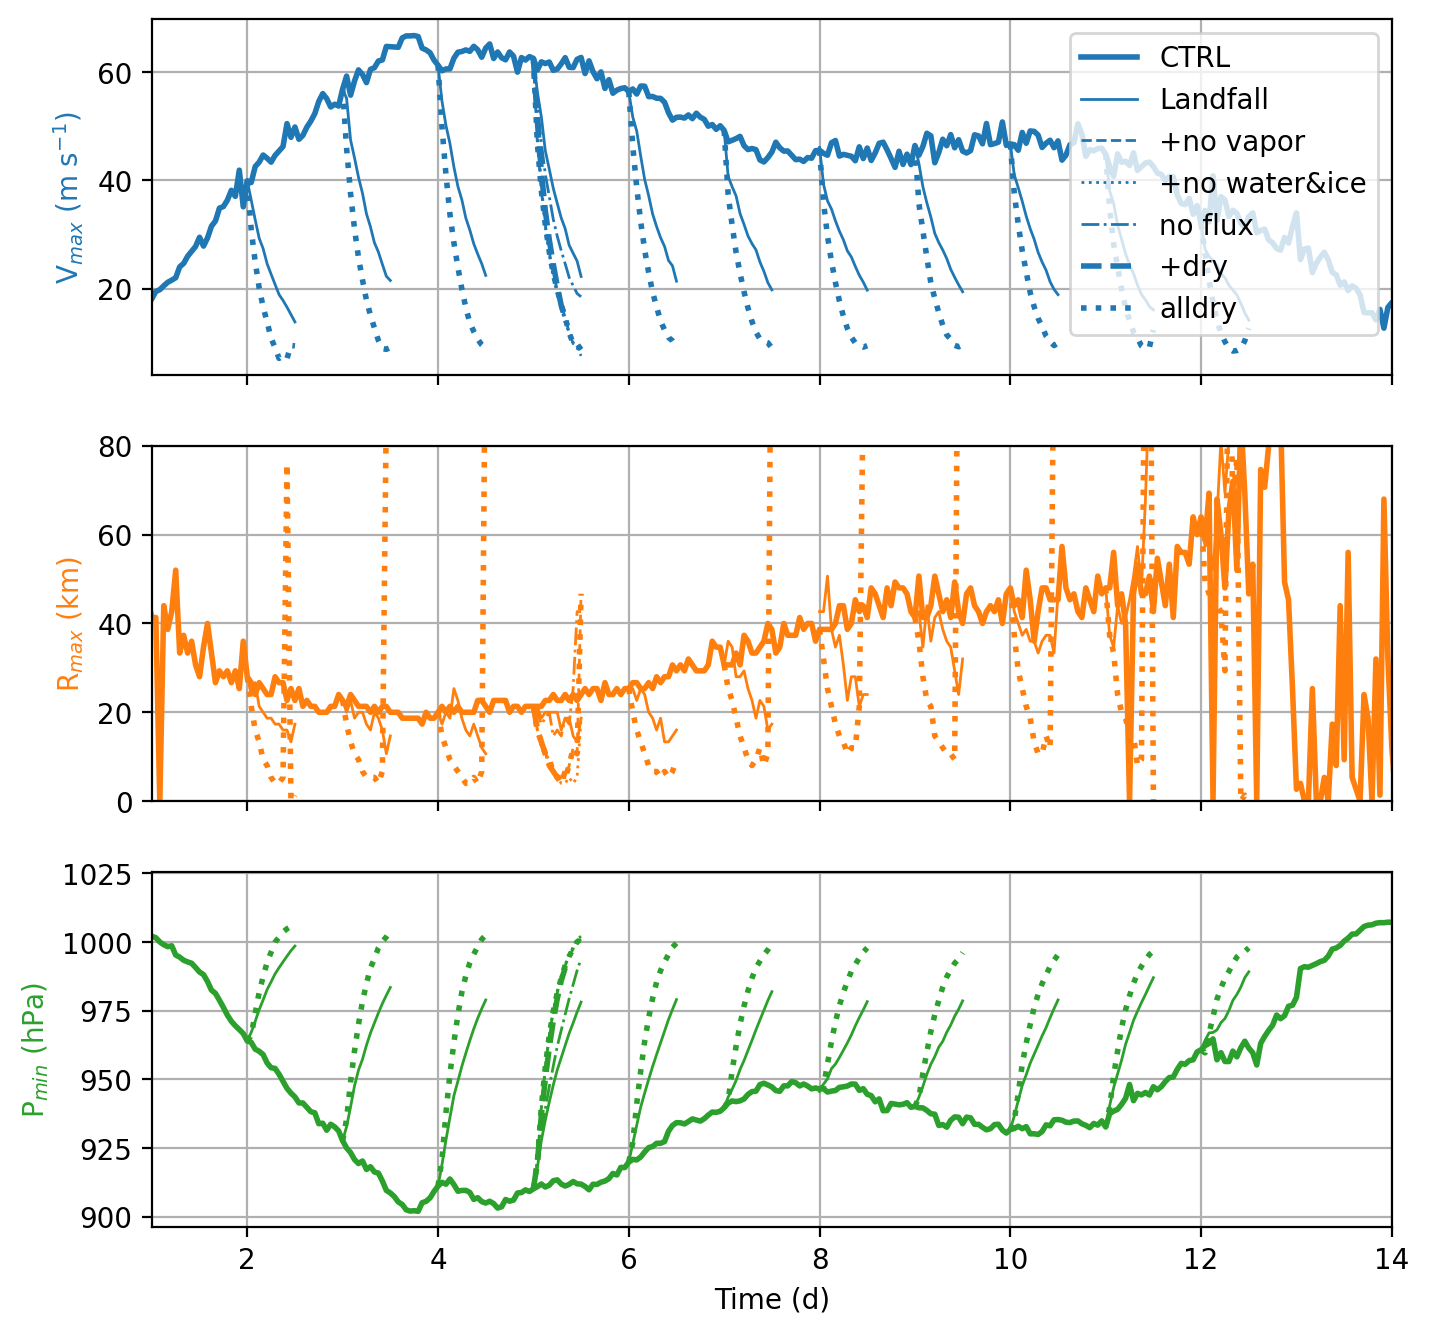

In [21]:
fig,axs=plt.subplots(3, 1, sharex='col',dpi=200)

linw=2

h0=axs[0].plot(df0.index,df0.V10max,color='C0',lw=linw,linestyle='-')
axs[1].plot(df0.index,df0.rV10max,color='C1',lw=linw,linestyle='-')
axs[2].plot(df0.index,df0.pmin,color='C2',lw=linw,linestyle='-')

# hx=axs[0].plot(df1.index,df1.V10max,color='C0',lw=linw,linestyle=':')
# axs[1].plot(df1.index,df1.rV10max,color='C1',lw=linw,linestyle=':')
# axs[2].plot(df1.index,df1.pmin,color='C2',lw=linw,linestyle=':')

axs[0].set_ylabel('V$_{max}$ (m s$^{-1}$)',color='C0')
axs[1].set_ylabel('R$_{max}$ (km)',color='C1')
axs[2].set_ylabel('P$_{min}$ (hPa)',color='C2')

linw=1
for n,df in enumerate(dfs):
    h1=axs[0].plot(df.index,df.V10max,color='C0',lw=linw,linestyle='-')
    axs[1].plot(df.index,df.rV10max,color='C1',lw=linw,linestyle='-')
    axs[2].plot(df.index,df.pmin,color='C2',lw=linw,linestyle='-')
        
for n,df in enumerate(dfds):
    h2=axs[0].plot(df.index,df.V10max,color='C0',lw=linw,linestyle='--')
    axs[1].plot(df.index,df.rV10max,color='C1',lw=linw,linestyle='--')
    axs[2].plot(df.index,df.pmin,color='C2',lw=linw,linestyle='--')
    
for n,df in enumerate(dfdQs):
    h3=axs[0].plot(df.index,df.V10max,color='C0',lw=linw,linestyle=':')
    axs[1].plot(df.index,df.rV10max,color='C1',lw=linw,linestyle=':')
    axs[2].plot(df.index,df.pmin,color='C2',lw=linw,linestyle=':')

for n,df in enumerate(dfdQF0s):
    h4=axs[0].plot(df.index,df.V10max,color='C0',lw=linw,linestyle='-.')
    axs[1].plot(df.index,df.rV10max,color='C1',lw=linw,linestyle='-.')
    axs[2].plot(df.index,df.pmin,color='C2',lw=linw,linestyle='-.')   

linw=2
for n,df in enumerate(dfdQ0ds):
    h5=axs[0].plot(df.index,df.V10max,color='C0',lw=linw,linestyle='--')
    axs[1].plot(df.index,df.rV10max,color='C1',lw=linw,linestyle='--')
    axs[2].plot(df.index,df.pmin,color='C2',lw=linw,linestyle='--')
     
linw=2
for n,df in enumerate(dfdrys):
    h6=axs[0].plot(df.index,df.V10max,color='C0',lw=linw,linestyle=':')
    axs[1].plot(df.index,df.rV10max,color='C1',lw=linw,linestyle=':')
    axs[2].plot(df.index,df.pmin,color='C2',lw=linw,linestyle=':')
    
    
# axs[0].set_xlabel('Time (d)')
# axs[0].set_position

# axs[1].set_xlabel('Time (d)')
# axs[1].set_position
axs[1].grid(True)
# axs[0].legend((h0,h1,h2,h3),('CTRL','Landfall','+no vapor','+no water&ice'))
axs[0].legend((h0[0],h1[0],h2[0],h3[0],h4[0],h5[0],h6[0]),('CTRL','Landfall','+no vapor','+no water&ice','no flux','+dry','alldry'))

axs[2].set_xlabel('Time (d)')
axs[2].set_position
axs[2].grid(True)

xmin=1
xmax=14
axs[0].set_xlim(xmin,xmax)
# plt.xticks(range(1,xmax))
axs[0].grid(True)

axs[1].set_ylim((0, 80))
fig.set_size_inches(8,8)
# fig.savefig('vmax_ts_.png',dpi=300,bbox_inches='tight', pad_inches=0.1,transparent=False)
plt.show()